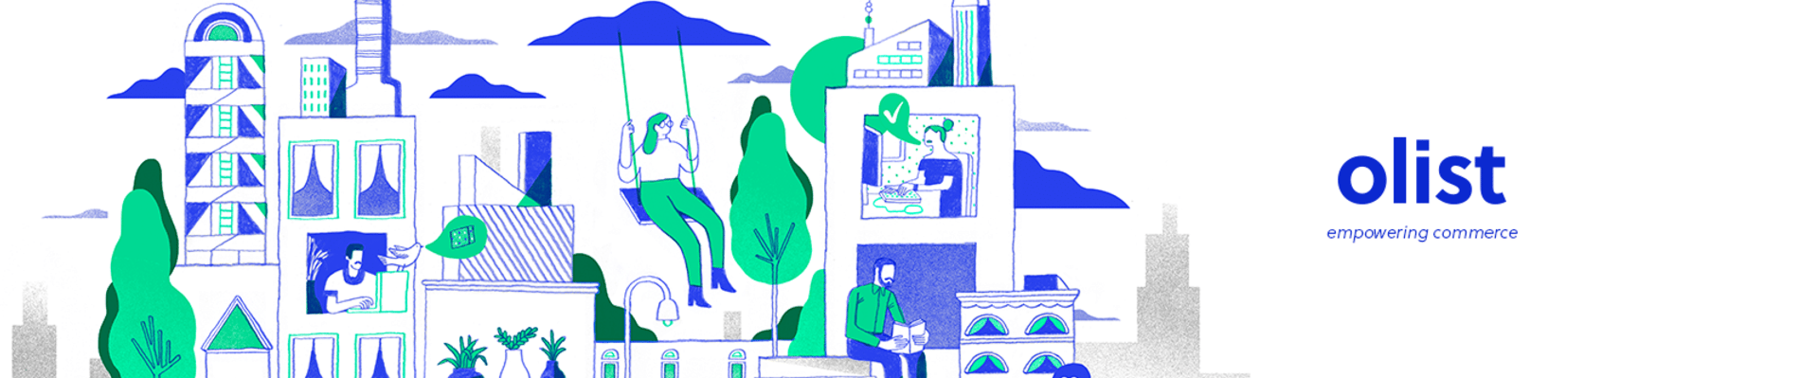

In [112]:
from IPython.display import Image
Image(filename='dataset-cover.png')

<h2 style = "color : Blue"> MARKETING & RETAIL ANALYTICS </h2> 

### PROBLEM STATEMENT I:

OList is one such e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing. In this assignment, you have to manage the inventory cost of this e-commerce company OList. 

You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

### PROBLEM STATEMENT II:

There are some other important aspects that you should consider, such as:

1. What should be the ideal category depth?
2. Some product combinations are sold more than others. This needs to be understood using market basket analysis.
3. After having specific categories in hand that will be beneficial to the company, how can you reduce the number of items in a particular category?

## Importing Required Libraries

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [3]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [4]:
# Setting options to view large data

pd.set_option('display.max_columns', 300) 
pd.set_option('display.max_rows', 300) 
pd.set_option('display.width', 1000)

In [5]:
# Separating the sheets accordingly

orders = pd.read_excel('Retail_dataset.xlsx', sheet_name = 'orders')
order_item = pd.read_excel('Retail_dataset.xlsx', sheet_name = 'order_items')
customers = pd.read_excel('Retail_dataset.xlsx', sheet_name = 'customers')
payments = pd.read_excel('Retail_dataset.xlsx', sheet_name = 'payments')
products = pd.read_excel('Retail_dataset.xlsx', sheet_name = 'products')

### A. Orders

In [6]:
# Identifying the top rows in the data

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [7]:
# Identifying the rows and columns available

orders.shape

(99441, 7)

In [8]:
# Check the column-wise info and the data type of the columns

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_timestamp      96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


In [9]:
# Checking Null values of the Orders sheet

orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_timestamp        2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
# Percentage of the Null values

null_orders=round(orders.isna().sum()/len(orders)*100,2)
null_orders.sort_values(ascending=False).head(10)

order_delivered_timestamp        2.98
order_approved_at                0.16
order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_estimated_delivery_date    0.00
dtype: float64

In [11]:
# Analysing the unique values in order_id and customer_id

print('Duplicate values for order_id :', orders.order_id.duplicated().sum())
print('Duplicate values for customer_id :', orders.customer_id.duplicated().sum())


Duplicate values for order_id : 0
Duplicate values for customer_id : 3345


In [12]:
# Analysing the order_status

orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [13]:
orders.order_id.isnull().sum()

0

#### i. Order Status Column

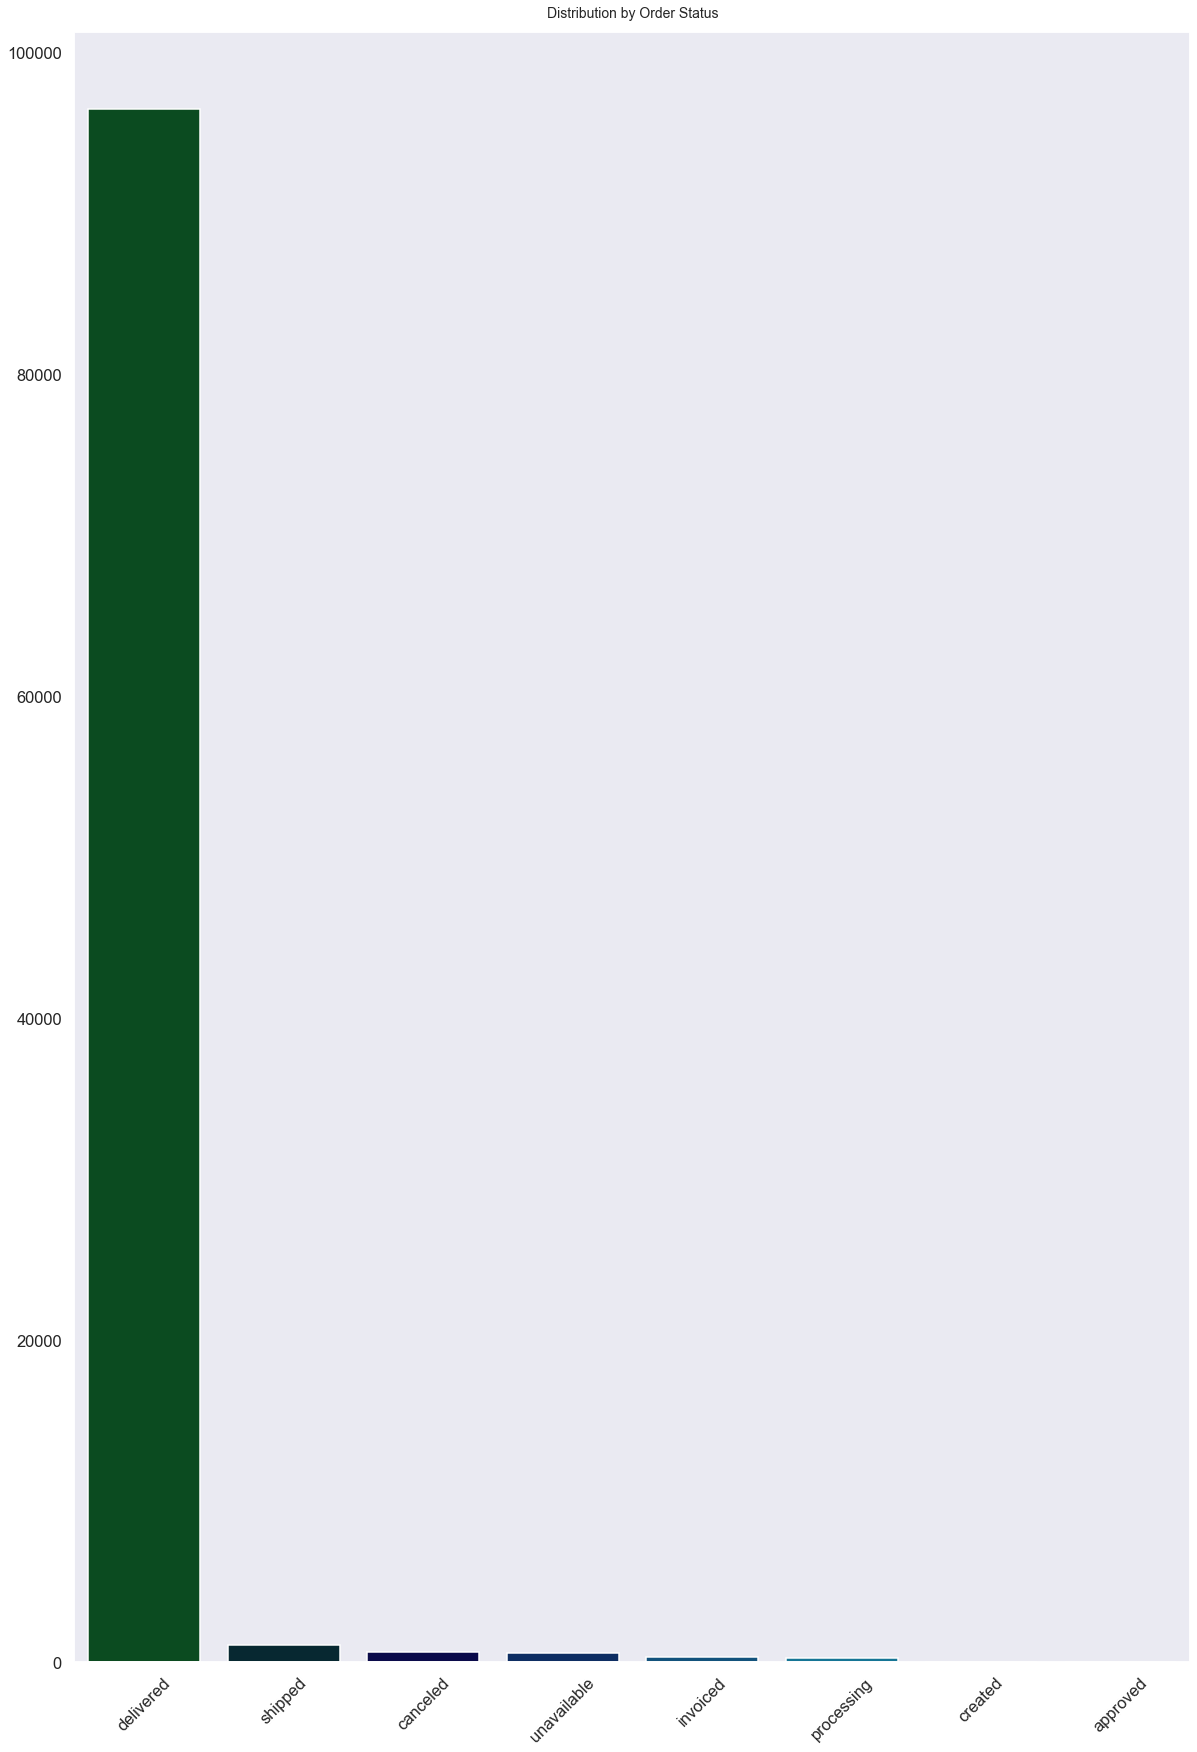

In [14]:
# Plotting a graph for Order Status

sns.set_theme(style="whitegrid")
sns.set_style('dark')
sns.set_context('talk')
plt.figure(figsize=(20,30))
plt.rcParams["axes.labelsize"] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titlepad'] = 14
plt.title("Distribution by Order Status")

plt.xticks(rotation=45)
#plt.xscale('log')
cnt_srs = orders.order_status.value_counts().head(20)
ax = sns.barplot(x=cnt_srs.index, y=cnt_srs.values, data=orders,palette="ocean")
plt.show()

> Delivered status consists more than 96k of the total data.

In [15]:
# Analysis with the order_status 'delivered' since that 97% of our data consists of only Delivered products

orders = orders[orders.order_status == "delivered"]
orders.shape

(96478, 7)

In [16]:
# Double check the orders dataframe

orders.order_status.value_counts()

delivered    96478
Name: order_status, dtype: int64

##### Analysing the Null Values in the Orders Column

In [17]:
# Checking the Null values in Orders column

null_orders=round(orders.isna().sum()/len(orders)*100,2)
print('Null values for Orders are :\n', orders.isnull().sum().sort_values(ascending=False))

print('\nPercentage of Null values:\n',null_orders.sort_values(ascending=False).head(10))

Null values for Orders are :
 order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

Percentage of Null values:
 order_approved_at                0.01
order_delivered_timestamp        0.01
order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_estimated_delivery_date    0.00
dtype: float64


In [18]:
# Finding the median values of 'order_approved_at - order_purchase_timestamp'
# With an assumptions of there will be time differences when customer purchasing the order and seller accepting the order

order_time_differences = (orders['order_approved_at'] - orders['order_purchase_timestamp']).median()

# Replacing the null values by adding the order_time_differences values with the order_approved_at column

orders.order_approved_at.fillna((orders.order_purchase_timestamp + order_time_differences), inplace=True)


> We are replacing the Null values exist in the order_approved_at column with an assumption that **there were times differences between when the customer placed an order and the seller approved the order**.

In [19]:
# Finding the median values of 'order_delivered_timestamp - order_approved_at'
# With an assumptions of there will be time differences when seller approved the order and the delivered times

order_delivered_differences = (orders['order_delivered_timestamp'] - orders['order_approved_at']).median()

# Replacing the null values by adding the order_time_differences values with the order_approved_at column

orders['order_delivered_timestamp'].fillna(orders['order_approved_at'] + order_delivered_differences,inplace=True)

> As the same goes with the order_delivered_timestamp column whereby there were time differences between the approval of the orders and the delivery of the orders.

In [20]:
# Checking the null values in order df

orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

In [21]:
orders.duplicated().sum()

0

* There are **NO null values and NO duplicates values** exists in the orders column, thus lets process with the next data.

### Order Item

In [22]:
# Identifying the total number rows and columns

order_item.shape

(112650, 6)

In [23]:
# Identifying the top 5 rows in the dataframe

order_item.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [24]:
# Check the column-wise info and the data type of the columns

order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [25]:
# Checking the null values in order_item

order_item.isnull().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [26]:
# Checking Duplicates value in order_items

order_item.duplicated().sum()

0

In [27]:
order_item.order_id.isnull().sum()

0

#### Analysing the numerical variables in the order_item column

In [28]:
# Checking the numerical columns in order_item

order_item.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
shipping_charges,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


> From the above data, we can infer that:
>> 1. The mean for the price is 120.65, with the minimum value of 0.85 and maximum values at 6735.00. Obviously there is an outliers present in the column, which will be treated in the next step.
>> 2. For the shipping charges column, the mean value is at 19.99, minimum value with 0 charges and the maximum values at 409.68.

In [29]:
# Analysing numerical variables in the dataset

num_orderitem = order_item[['price', 'shipping_charges']]
num_orderitem.head()

,price,shipping_charges
0,58.90,13.29
1,239.90,19.93
2,199.00,17.87
3,12.99,12.79
4,199.90,18.14


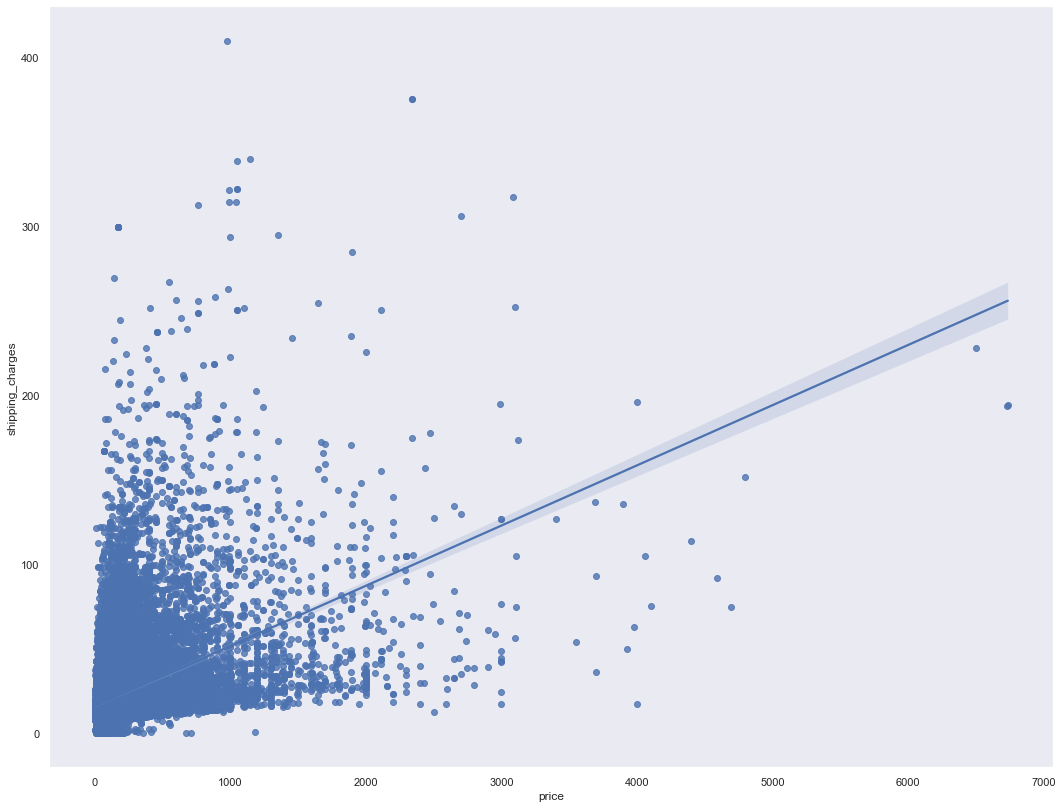

In [30]:
# Analysing the correlation between price and shipping charges column

plt.figure(figsize=(18,14))
sns.set(style='dark')
ax = sns.regplot(x="price", y="shipping_charges", data=order_item, color='b')
plt.show()

>> From the scatter plot, price and shipping charges, there are **positively correlated**.

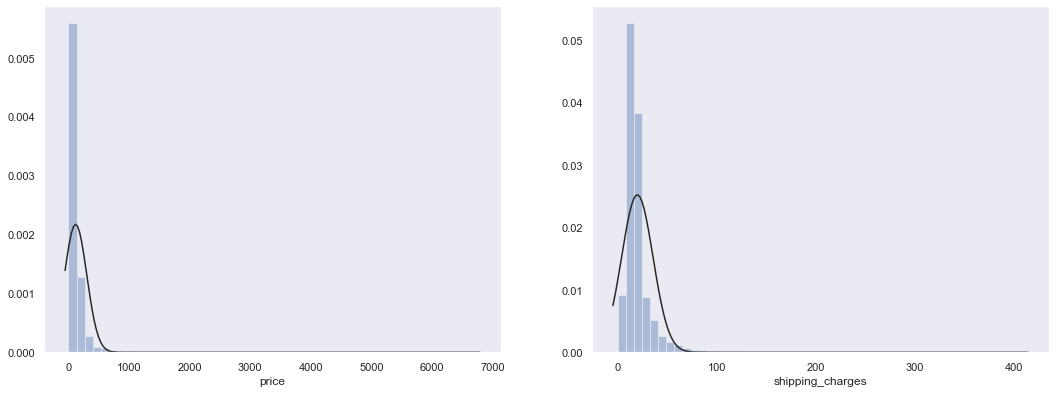

In [31]:
# Analysing the distribution plot for 'price' and 'shipping charges'

from scipy.stats import norm

plt.figure(figsize=(18,14))
sns.set_style("dark") 
plt.subplot(2,2,1)
sns.distplot(order_item.price,fit=norm, kde=False)
plt.subplot(2,2,2)
sns.distplot(order_item.shipping_charges, fit=norm, kde=False)

plt.show()

> The distribution plot of the numerical variables are very important in determine the skewness of the data. For our price and shipping charges column, **both of the variables are rightly skewed.**

### Analysing The Distribution of the Numerical Column and Treatment of Outliers

> - One of the method for the outliers treatments is by imputing the outliers, instead of dropping them, This is important to ensure that we do not lose any important data for our further analysis.

**A. PRICE column**

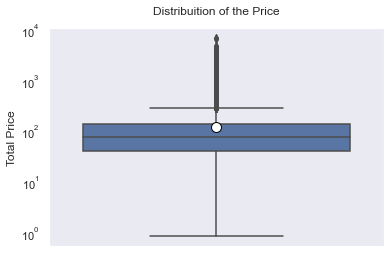

Mean value : 120.65373901477311


In [32]:
# Analysing the outliers for the Price variables

sns.boxplot(data= order_item, y='price', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yscale('log')
plt.title('Distribuition of the Price')
plt.ylabel('Total Price')
plt.show()
print('Mean value :', order_item.price.mean())

> - [X] Above Boxplot has shown that there are an outliers present in the Price column, an equal distribution between the 1st quartile and the 3rd quartile. Mean value lies at 120.65.

In [33]:
order_item.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
shipping_charges,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


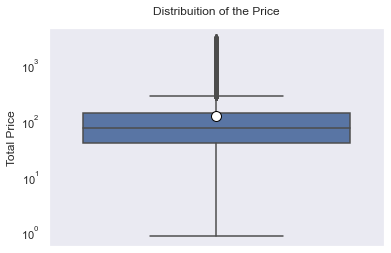

In [34]:
# Outlier Treatment: From the distplot, we have decided to impute the value which is 
# Greater than 3000 with median value

order_item.loc[((order_item['price']>3000), 'price')]=order_item['price'].median()
sns.boxplot(data= order_item, y='price', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yscale('log')
plt.title('Distribuition of the Price')
plt.ylabel('Total Price')
plt.show()


> - After imputing the outliers, we can clearly see the distribution of the price, almost equal distribution in 1st quartile and 3rd quartile.
> - The maximum values for the price has been capped at 3000.

**B. `SHIPPING CHARGES` column**

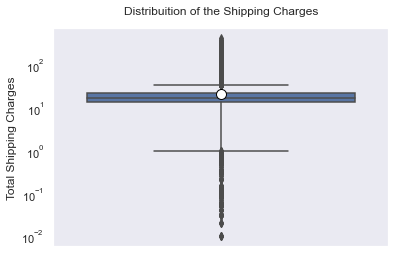

Mean value : 19.99031992898562


In [35]:
# Analysing the distribution for the Shipping charges variables

sns.boxplot(data= order_item, y='shipping_charges', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yscale('log')
plt.title('Distribuition of the Shipping Charges')
plt.ylabel('Total Shipping Charges')
plt.show()
print('Mean value :', order_item.shipping_charges.mean())

> - [X] There are significant outliers present in the above boxplot. We will carry out the imputation in the next step.

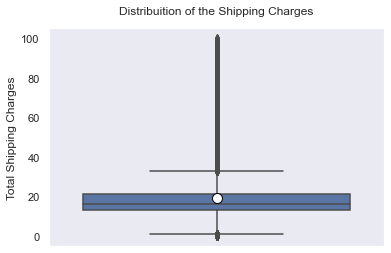

In [36]:
# For shipping charges, based from the distplot, we will impute the value > 100
# with the median value

order_item.loc[order_item['shipping_charges']>100, 'shipping_charges'] = order_item['shipping_charges'].median()
sns.boxplot(data= order_item, y='shipping_charges', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#plt.yscale('log')
plt.title('Distribuition of the Shipping Charges')
plt.ylabel('Total Shipping Charges')
plt.show()

> - Once we have done with the outlier treatments, we can infer that there are quite an equal distribution of the shipping charges in the first and the third quartile, however, it is slightly more on the third quartile.
> - And the maximum value for the shipping charges are at 99.97.

In [37]:
order_item.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,119.755382,172.964311,0.85,39.90,74.99,134.90,2999.99
shipping_charges,112650.0,19.229668,11.992284,0.00,13.08,16.26,20.99,99.97


> We have successfully removed the outliers from the price and shipping_charges column. Thus from the above chart, we can infer that:
>> 1. The mean value for the price is 119.76, minimum value is 0.85 and maximum value is 2999.99.
>> 2. Shipping charges mean value currently lies at 19.23, minimum and maximum value are in the range of 0.00 and 99.97.

### Customers

In [38]:
# Checking the rows and column for the Customers data

customers.shape

(99441, 4)

In [39]:
# Analysing the Top 5 rows of the data

customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [40]:
# Checking the data types and the column-wise info in the data frame

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [41]:
# Checking the Null values in the column

customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [42]:
# Checking the Duplicated values in the column

customers.duplicated().sum()

3089

In [43]:
# Dropping the duplicates value in customer_id by keeping only distinct customer_id

customers.drop_duplicates(subset='customer_id', keep = 'first', inplace = True)

> It is crucial to keep only distinct values in customer_id for our further analysis, 1 customer should have only 1 customer_id.

In [44]:
# Double check the duplicates value in customer_id

print('Duplicates value of customer_id: ', customers.customer_id.duplicated().sum())

Duplicates value of customer_id:  0


In [45]:
customers.duplicated().sum()

0

In [46]:
customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

>> There are **NO null values as well as NO duplicated values** in the customers data, thus lets move forward.

### Payments

In [47]:
# Checking the number of rows and columns in the dataframe

payments.shape

(103886, 5)

In [48]:
# Analysing the Top 5 rows in Payments data

payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [49]:
# Checking the data types and the column-wise info in the data frame

payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [50]:
# Checking the Null values in the data

payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [51]:
# Proceed with the duplicated values 

payments.duplicated().sum()

0

>> **There are NO null values and NO duplicate values in this data.**

##### Analysing the Payment Type column

In [52]:
# Visualisation of the categorical variables

payments.payment_type.value_counts()

credit_card    76795
wallet         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

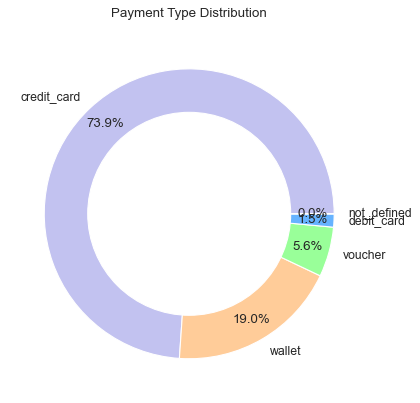

In [53]:
# Visualising the distribution for the Payment Type columns

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

#sns.color_palette("tab10")
temp_series = payments['payment_type'].value_counts()
labels = (np.array(temp_series.index))
#explode = (0.05,0.1,0.1,0.1)
colors = ['#c2c2f0', '#ffcc99', '#99ff99', '#66b3ff']

plt.pie(temp_series, labels = labels,  autopct="%1.1f%%", colors=colors, pctdistance=0.85)
plt.title('Payment Type Distribution')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.show()

>> From the above pie chart, we can infer that:
>>> - Most of the orders done by customers are through the Credit Card which is 73.9%. Followed closely by Wallet and Voucher with 19% and 5.56%.
>>> - There are some medium of payment which is not defined, for this we will drop the payment type as it will not effect our analysis later on.


In [54]:
#Dropping the rows with not_defined which won't have a significant impact on the dataset.

i = payments[payments['payment_type']=='not_defined'].index
payments.drop(i, axis=0, inplace=True)

In [55]:
# Validating the dropping column

payments.payment_type.value_counts()

credit_card    76795
wallet         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

##### Analysing the numerical variables in the Payment column

In [56]:
payments.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103883.0,1.092681,0.706594,1.0,1.0,1.0,1.00,29.00
payment_installments,103883.0,2.853402,2.687071,0.0,1.0,1.0,4.00,24.00
payment_value,103883.0,154.104831,217.495628,0.0,56.8,100.0,171.84,13664.08


> From the above graph, we can see that:
>>1. The payment_sequential mean lies at 1.09, minimum is at 1.0 while the maximum value is 29.00
>>2. The payment_installments mean is 2.85 installments, minimum payment for installment is 0 and the maximum is 24.00.
>>3. Mean for the payment_value is 154.10, minimum is at 0 amd maximum is 13664.08.

In [57]:
# Numerical variables in the Payments column

num_payments = payments[['payment_sequential','payment_installments','payment_value']]
num_payments.head()

,payment_sequential,payment_installments,payment_value
0,1,8,99.33
1,1,1,24.39
2,1,1,65.71
3,1,8,107.78
4,1,2,128.45


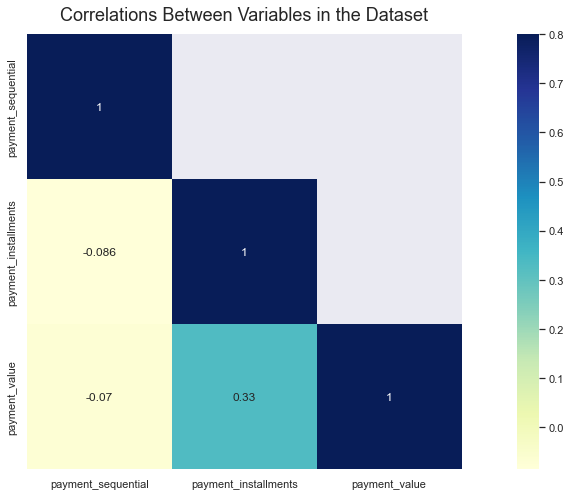

In [58]:
# Checking the correlation between variables

plt.figure(figsize=(20,8))
mask = np.array(num_payments.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(num_payments.corr(), mask = mask, vmax = .8, square =  True, annot=True, cmap='YlGnBu')

sns.set_style('whitegrid')
sns.set_context('talk')
plt.title('Correlations Between Variables in the Dataset')
plt.show()

> Inferences from the heatmap above:
>> 1. **Payment installment is positively correlated with the payment value**, it means, if the value is high, then the installment will be higher as well with 0.33 correlation.
>> 2. **Payment value and payment installment are negatively correlated with payment sequential** with -0.07 and -0.086.

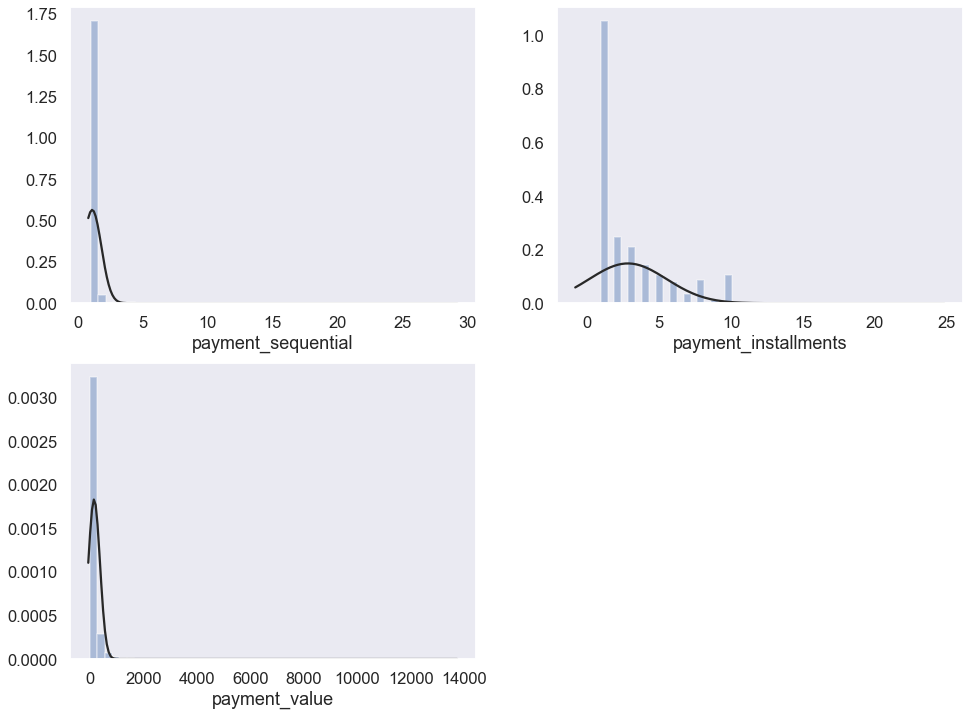

In [59]:
# Analysing the distribution plot for payment_sequential, payment_installment and payment_values

from scipy.stats import norm

plt.figure(figsize=(16,12))
sns.set_style("dark") 
plt.subplot(2,2,1)
sns.distplot(payments.payment_sequential,fit=norm, kde=False)
plt.subplot(2,2,2)
sns.distplot(payments.payment_installments, fit=norm, kde=False)
plt.subplot(2,2,3)
sns.distplot(payments.payment_value, fit=norm, kde=False)

plt.show()

> For all of the graphs, those 3 variables are rightly skewed. And there are outliers present in the column which can be seen from the tail of the distplot.

##### Analysing the Distribution in the Payment columns

`Payment_Installments` column.

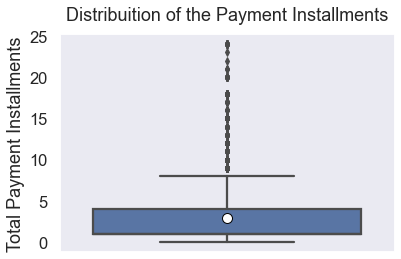

Mean value : 2.8534023853758557


In [60]:
# Plotting a boxplot

sns.boxplot(data= payments, y='payment_installments', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#plt.yscale('log')
plt.title('Distribuition of the Payment Installments')
plt.ylabel('Total Payment Installments')
plt.show()
print('Mean value :', payments.payment_installments.mean())

>> The median value lies at 1 installment, which the maximum values are 24, which is 2 years.

`Payment_value` column.

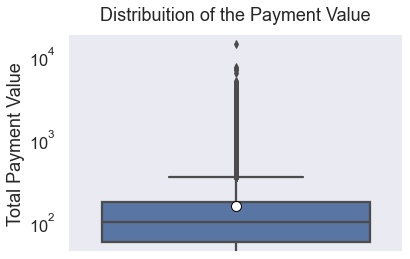

Mean value : 154.1048306267509


In [61]:
# Plotting a box plot

sns.boxplot(data= payments, y='payment_value', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yscale('log')
plt.title('Distribuition of the Payment Value')
plt.ylabel('Total Payment Value')
plt.show()
print('Mean value :', payments.payment_value.mean())

>> Looks like there is an equal distribution for the 1st quartile and the 3rd quartile.

In [62]:
# Checking the final null values for payments data

payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [63]:
# Checking the final duplicates value if its exist in the payments data

payments.duplicated().sum()

0

### Products

In [64]:
# Identifying the rows and columns available

products.shape

(32951, 6)

In [65]:
# Identifying the top rows in the data

products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [66]:
# Check the column-wise info and the data type of the columns

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [67]:
# Checking Null values of the Products data

products.isnull().sum().sort_values(ascending=False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [68]:
# Percentage of the Null values

null_products = round(products.isnull().sum()/len(products)*100,4)
null_products.sort_values(ascending=False).head(10)

product_category_name    0.5159
product_weight_g         0.0061
product_length_cm        0.0061
product_height_cm        0.0061
product_width_cm         0.0061
product_id               0.0000
dtype: float64

In [69]:
# Analysing the product_category_name column

products.product_category_name.value_counts().head(10)

toys                     24725
bed_bath_table             789
sports_leisure             721
furniture_decor            687
health_beauty              648
housewares                 631
auto                       489
computers_accessories      425
watches_gifts              336
telephony                  286
Name: product_category_name, dtype: int64

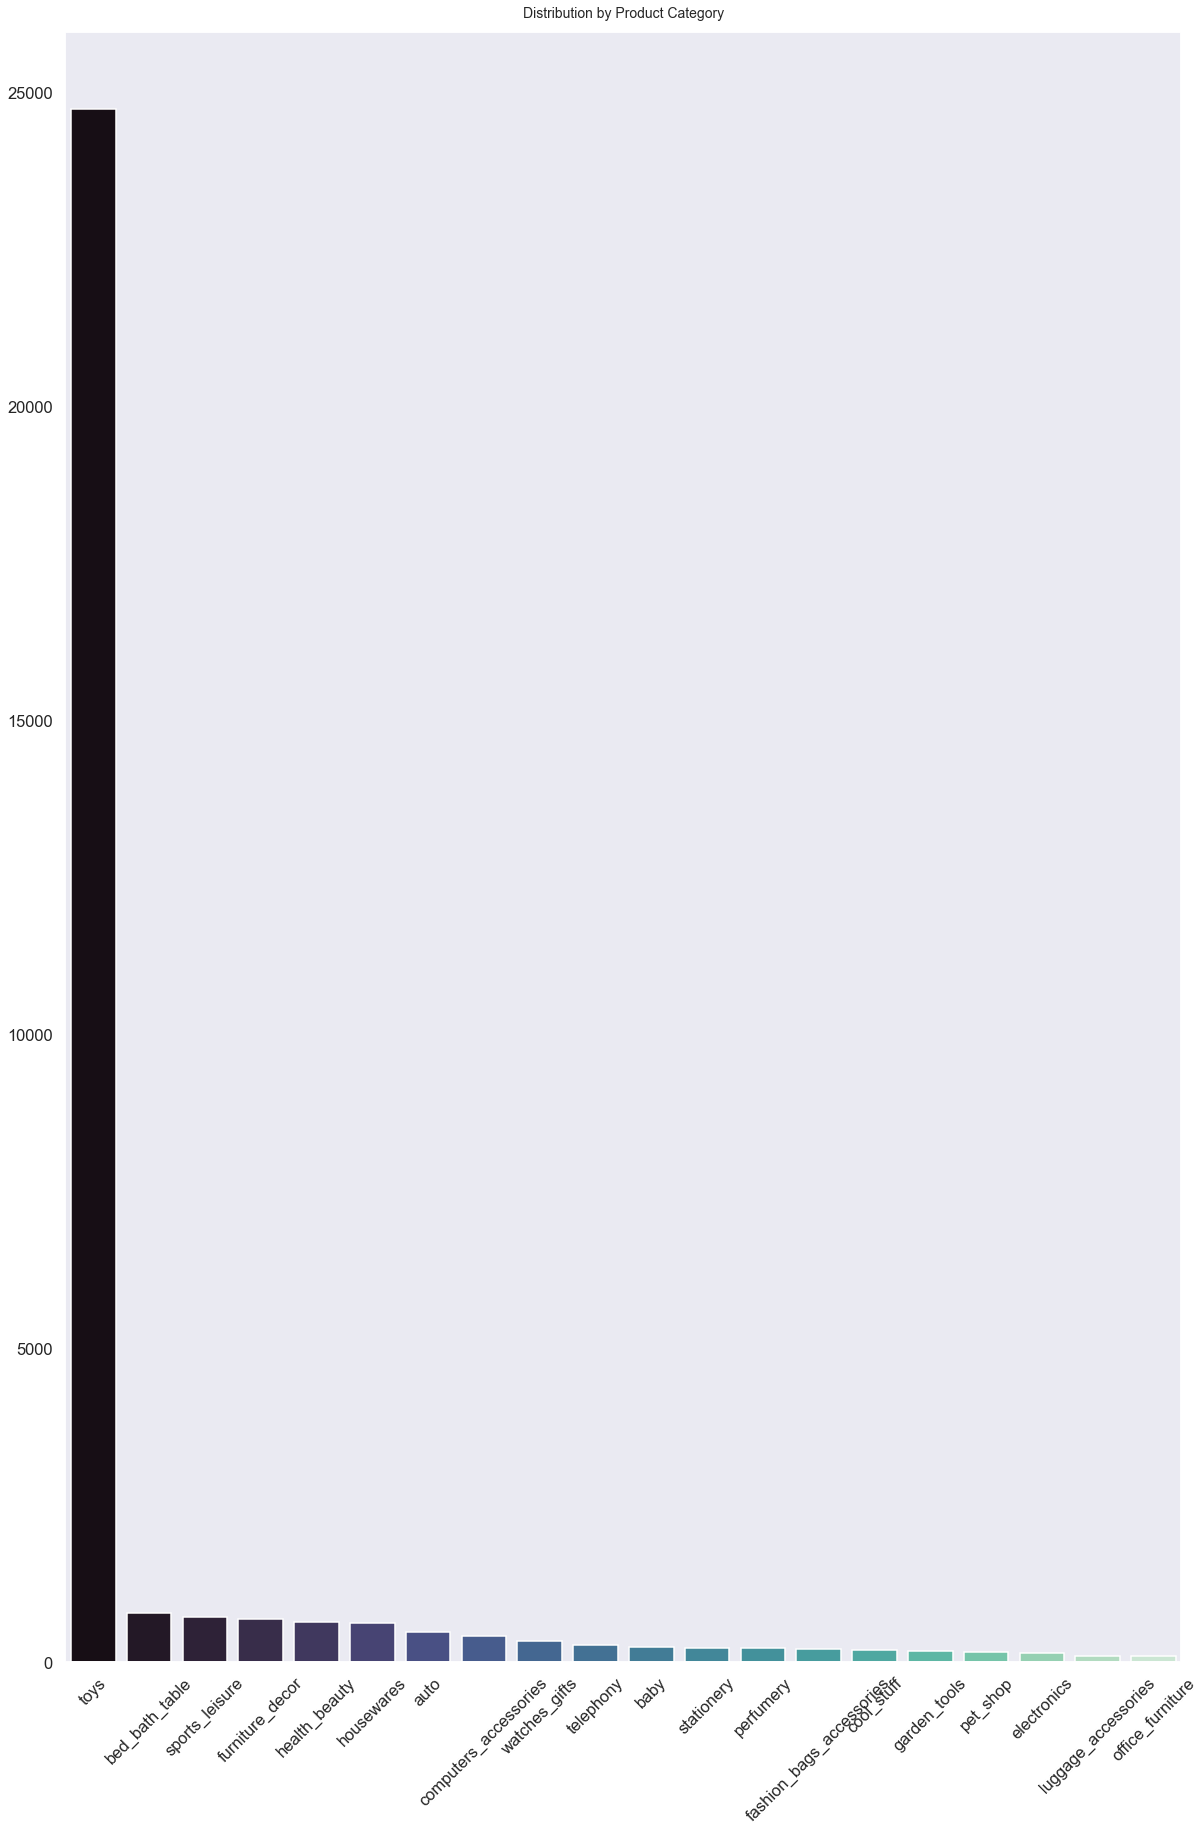

In [70]:
# Plotting a graph for Product Category

sns.set_theme(style="whitegrid")
sns.set_style('dark')
sns.set_context('talk')
plt.figure(figsize=(20,30))
plt.rcParams["axes.labelsize"] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titlepad'] = 14
plt.title("Distribution by Product Category")

plt.xticks(rotation=45)
#plt.xscale('log')
cnt_srs = products.product_category_name.value_counts().head(20)
ax = sns.barplot(x=cnt_srs.index, y=cnt_srs.values, data=products,palette='mako')
plt.show()

>> From the above chart, we can clearly see the majority of the product category count, which is dominated by Toys category. Rest of the product category will not have much impact on the organization, however it is very important to ensure that from our further analysis, we will analyse the other category as well to increase the chances of cross-selling.

In [71]:
# Analysing the numerical column

products.describe().T

,count,mean,std,min,25%,50%,75%,max
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


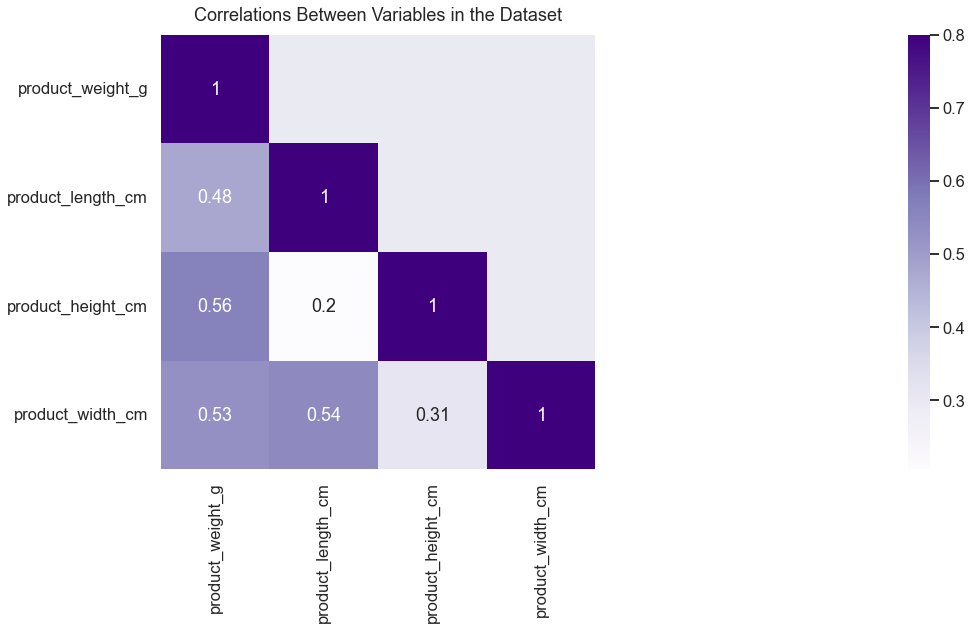

In [72]:
# Checking the correlation between variables

plt.figure(figsize=(112,8))
mask = np.array(products.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(products.corr(), mask = mask, vmax = .8, square =  True, annot=True, cmap='Purples')

sns.set_style('whitegrid')
sns.set_context('talk')
plt.title('Correlations Between Variables in the Dataset')
plt.show()

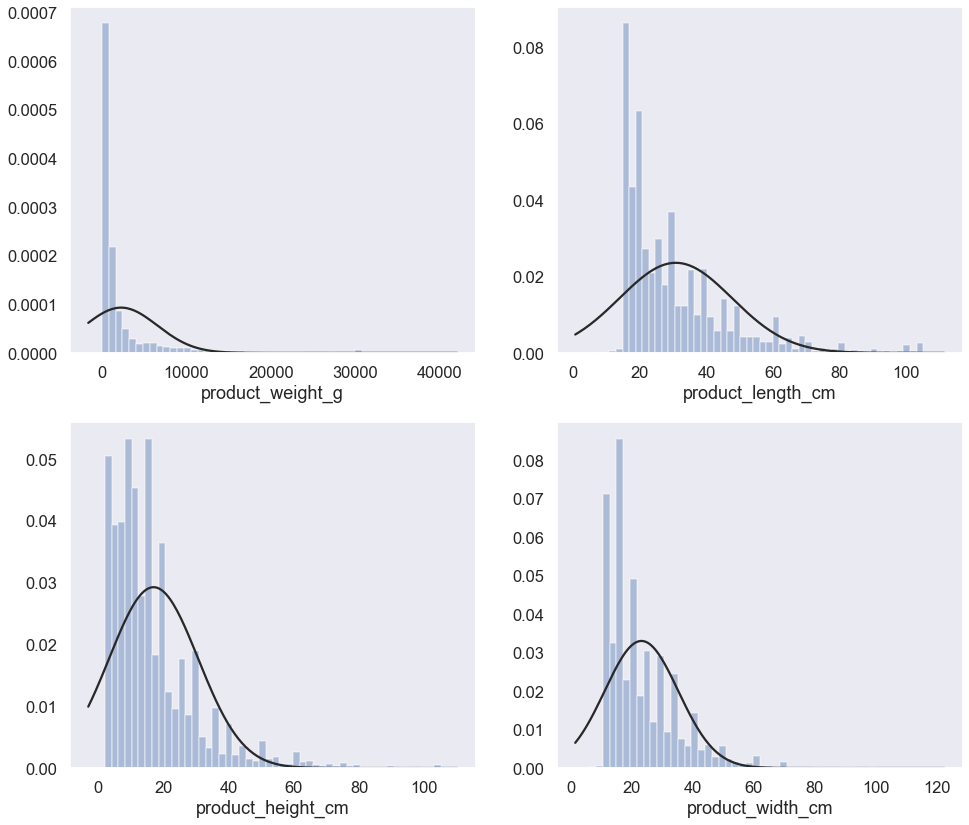

In [73]:
# Plotting the distribution of the variables by using distplot

plt.figure(figsize=(16,14))
sns.set_style('dark')
plt.subplot(2,2,1)
sns.distplot(products.product_weight_g,fit=norm, kde=False)
plt.subplot(2,2,2)
sns.distplot(products.product_length_cm,fit=norm, kde=False)
plt.subplot(2,2,3)
sns.distplot(products.product_height_cm,fit=norm, kde=False)
plt.subplot(2,2,4)
sns.distplot(products.product_width_cm,fit=norm, kde=False)

plt.show()

#### Analysing and treating the null values

In [74]:
# Checking the null values in the data

products.isnull().sum().sort_values(ascending=False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [75]:
# Analysing the product_category_name column

products.product_category_name.value_counts().head(10)

toys                     24725
bed_bath_table             789
sports_leisure             721
furniture_decor            687
health_beauty              648
housewares                 631
auto                       489
computers_accessories      425
watches_gifts              336
telephony                  286
Name: product_category_name, dtype: int64

In [76]:
# Finding the mode value for the product_category_name

products.product_category_name.mode()[0]

'toys'

In [77]:
# Imputing the rest of the null values in the column with the common value (mode)

products.product_category_name.fillna(products.product_category_name.mode()[0], inplace=True)

In [78]:
# Finalizing the null values in the products category

products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

In [79]:
# Imputing the rest of the null values in the column with the median due to the skewness of the data

products.product_weight_g.fillna(products.product_weight_g.median(), inplace=True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace=True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace=True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace=True)

##### Analysing the distribution of numerical columns

In [80]:
products.describe().T

,count,mean,std,min,25%,50%,75%,max
product_weight_g,32951.0,2276.376802,4281.926387,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32951.0,30.814725,16.914005,7.0,18.0,25.0,38.0,105.0
product_height_cm,32951.0,16.937422,13.637175,2.0,8.0,13.0,21.0,105.0
product_width_cm,32951.0,23.196534,12.078707,6.0,15.0,20.0,30.0,118.0


`product_weight_g` column

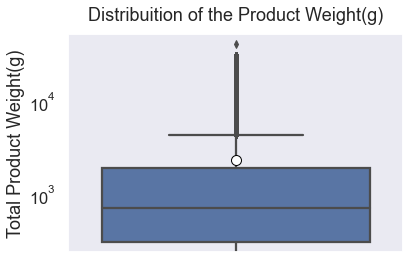

Mean value : 2276.3768019179993


In [81]:
# Plotting a boxplot 

sns.boxplot(data= products, y='product_weight_g', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yscale('log')
plt.title('Distribuition of the Product Weight(g)')
plt.ylabel('Total Product Weight(g)')
plt.show()
print('Mean value :', products.product_weight_g.mean())

>> - There are more distribution on the 3rd quartile than the 1st quartile, while the mean value lies at 2276.37g.

`product_length_cm` column

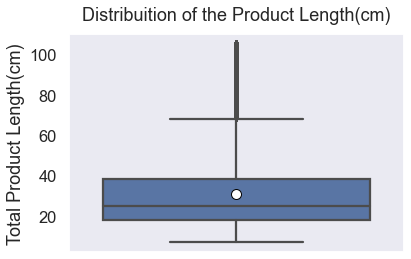

Mean value : 30.81472489454038


In [82]:
# Plotting a boxplot 

sns.boxplot(data= products, y='product_length_cm', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#plt.yscale('log')
plt.title('Distribuition of the Product Length(cm)')
plt.ylabel('Total Product Length(cm)')
plt.show()
print('Mean value :', products.product_length_cm.mean())

>> - For the product length, there are more distribution towards the 3rd quartile than the 1st quartile. The maximum value of product length is 105. Mean value is at 30.814.

`product_height_cm` column

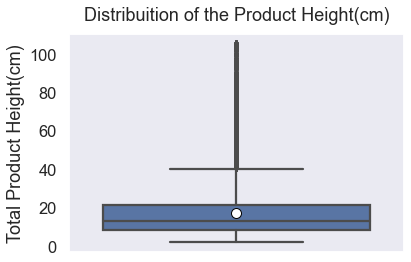

Mean value : 16.937422233012654


In [83]:
# Plotting a boxplot 

sns.boxplot(data= products, y='product_height_cm', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#plt.yscale('log')
plt.title('Distribuition of the Product Height(cm)')
plt.ylabel('Total Product Height(cm)')
plt.show()
print('Mean value :', products.product_height_cm.mean())

>> -  For the product height, the minimum value lies at 2cm,Mean value is at 16.93. While there seems to be an equal distribution between quartile 1st and 3rd, however, it is greater in quartile 3.

`product_width_cm` column

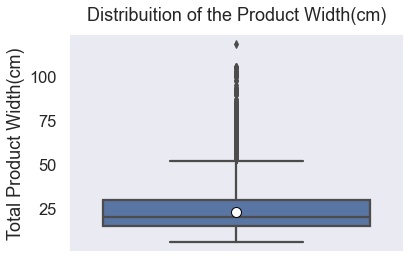

Mean value : 23.196534247822523


In [84]:
# Plotting a boxplot

sns.boxplot(data= products, y='product_width_cm', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#plt.yscale('log')
plt.title('Distribuition of the Product Width(cm)')
plt.ylabel('Total Product Width(cm)')
plt.show()
print('Mean value :', products.product_width_cm.mean())

>> - The maximum value of product width is 118 cm, and there are greater range in the 3rd quartile instead of the 1st quartile, with Mean value is at 23.1965 cm.

In [85]:
# Finalizing the null values in the products category

products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [86]:
# Finalizing the duplicates values if exists in the data

products.duplicated().sum()

0

In [87]:
# Final rows and rows upon completion of the data cleaning

print(orders.shape)
print(order_item.shape)
print(customers.shape)
print(payments.shape)
print(products.shape)

(96478, 7)
(112650, 6)
(96096, 4)
(103883, 5)
(32951, 6)


### MERGED THE DATASET

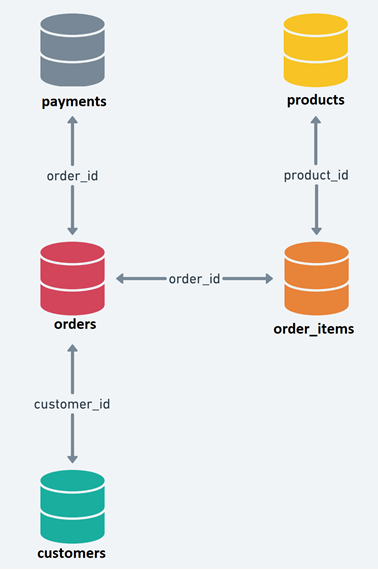

In [88]:
from IPython.display import Image
Image(filename='OList-ERD.png')

>> Above is the ERD Diagram for this OList dataset. This ERD diagram is crucial in order to join the dataset with the common value on every datasets.

In [89]:
# Merging the column of orders and order_item

orditem_ord= pd.merge(orders, order_item, how='inner', on='order_id')
orditem_ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [90]:
# Identifying the rows and columns in the dataset

orditem_ord.shape

(110197, 12)

In [91]:
# Checking the duplicates values

orditem_ord.duplicated().sum()

0

In [92]:
# Checking if the null values exists

orditem_ord.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
dtype: int64

In [93]:
# Merging the column of orders and customers

ord_cust= pd.merge(orditem_ord,customers, how='inner', on='customer_id')
ord_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3149,sao paulo,SP
1,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,3149,sao paulo,SP
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,47813,barreiras,BA
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,75265,vianopolis,GO
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,59296,sao goncalo do amarante,RN


In [94]:
# Identifying the rows and columns in the dataset

ord_cust.shape

(110197, 15)

In [95]:
# Checking the duplicates values

ord_cust.duplicated().sum()

0

In [96]:
# Checking if the null values exists in the datasets

ord_cust.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [97]:
# Merging the column of ord_cust and payments

ordcust_pay= pd.merge(ord_cust, payments, how='inner', on='order_id')
ordcust_pay.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3149,sao paulo,SP,2,voucher,1,18.59
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,3149,sao paulo,SP,1,credit_card,1,44.11
4,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,47813,barreiras,BA,1,wallet,1,141.46


In [98]:
# Identifying the rows and columns in the dataset

ordcust_pay.shape

(115035, 19)

In [99]:
# Checking the duplicates values

ordcust_pay.duplicated().sum()

0

In [100]:
# Checking if the null values exists in the dataset

ordcust_pay.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

In [101]:
# Merging the column of order_item and products

retail_final= pd.merge(ordcust_pay, products, how='inner', on='product_id')
retail_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3149,sao paulo,SP,1,credit_card,1,18.12,housewares,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3149,sao paulo,SP,3,voucher,1,2.00,housewares,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3149,sao paulo,SP,2,voucher,1,18.59,housewares,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,3366,sao paulo,SP,1,credit_card,3,37.77,housewares,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,ef0996a1a279c26e7ecbd737be23d235,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,2290,sao paulo,SP,1,credit_card,1,37.77,housewares,500.0,19.0,8.0,13.0


In [102]:
# Identifying the rows and columns in the dataset

retail_final.shape

(115035, 24)

In [103]:
# Checking the duplicates values

retail_final.duplicated().sum()

0

In [104]:
# Checking if the null values exists in the dataset

retail_final.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [105]:
# Check the column-wise info and the data type of the columns

retail_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115035 entries, 0 to 115034
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115035 non-null  object        
 1   customer_id                    115035 non-null  object        
 2   order_status                   115035 non-null  object        
 3   order_purchase_timestamp       115035 non-null  datetime64[ns]
 4   order_approved_at              115035 non-null  datetime64[ns]
 5   order_delivered_timestamp      115035 non-null  datetime64[ns]
 6   order_estimated_delivery_date  115035 non-null  datetime64[ns]
 7   order_item_id                  115035 non-null  int64         
 8   product_id                     115035 non-null  object        
 9   seller_id                      115035 non-null  object        
 10  price                          115035 non-null  float64       
 11  

### MARKET BASKET ANALYSIS DATASET

In [106]:
# Combining only the required columns for analysis

mb = retail_final[['product_category_name','order_id', 'order_item_id']]

# Checking the Top 5 rows
mb.head()

,product_category_name,order_id,order_item_id
0,housewares,e481f51cbdc54678b7cc49136f2d6af7,1
1,housewares,e481f51cbdc54678b7cc49136f2d6af7,1
2,housewares,e481f51cbdc54678b7cc49136f2d6af7,1
3,housewares,128e10d95713541c87cd1a2e48201934,1
4,housewares,0e7e841ddf8f8f2de2bad69267ecfbcf,1


In [108]:
# Finalizing the rows and columns

mb.shape

(115035, 3)

#### Exporting the cleaned data sets as well as Market Basket Data to be visualized in Tableau.

In [109]:
import xlsxwriter

# Exporting the cleaned retail_datasets
writer = pd.ExcelWriter('Market_Retail_Analysis(Final) - Nurshafizah Mohd Kamil.xlsx', engine='xlsxwriter')
orders.to_excel(writer, sheet_name='orders', index = False, na_rep=0)
order_item.to_excel(writer, sheet_name='order_items', index = False, na_rep=0)

customers.to_excel(writer, sheet_name='customers', index = False, na_rep=0)
payments.to_excel(writer, sheet_name='payments', index = False, na_rep=0)
products.to_excel(writer, sheet_name='products', index = False, na_rep=0)
writer.save()
print("Cleaned Data Sets exported successfully.")

Cleaned Data Sets exported successfully.


In [110]:
import xlsxwriter

# Exporting the cleaned retail_datasets
writer = pd.ExcelWriter('Market Basket - Nurshafizah Mohd Kamil.xlsx', engine='xlsxwriter')
mb.to_excel(writer, sheet_name='mb', index = False)

writer.save()
print("Cleaned Data Sets exported successfully.")

Cleaned Data Sets exported successfully.
